In [1]:
#calling the libraries require for performing EDA on the dataset
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Reading the dataset

In [27]:
df=pd.read_csv(r'F:\covid19.csv')
df

,S.No.,1,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,...,Source_2,Source_3,Backup Notes,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,1.0,KL-TS-P1,30-01-2020,20,F,Thrissur,Thrissur,Kerala,...,https://weather.com/en-IN/india/news/news/2020...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3.0,2.0,KL-AL-P1,02-02-2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4.0,3.0,KL-KS-P1,03-02-2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.0,4.0,DL-P1,02-03-2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,8096,8097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8097,8097,8098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8098,8098,8099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8099,8099,8100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

S.No.                                          int64
1                                            float64
Patient Number                               float64
State Patient Number                          object
Date Announced                                object
Age Bracket                                   object
Gender                                        object
Detected City                                 object
Detected District                             object
Detected State                                object
State code                                    object
Current Status                                object
Notes                                         object
Contracted from which Patient (Suspected)     object
Nationality                                   object
Type of transmission                          object
Status Change Date                            object
Source_1                                      object
Source_2                                      

In [4]:
print(df.shape)

(8101, 28)


# Creating a new subset

In [5]:
df_sub=df[["Detected State","Age Bracket","Gender"]]

In [6]:
df_sub.head()

,Detected State,Age Bracket,Gender
0,NaN,NaN,NaN
1,Kerala,20,F
2,Kerala,NaN,NaN
3,Kerala,NaN,NaN
4,Delhi,45,M


In [7]:
print(df_sub.shape)

(8101, 3)


In [8]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 3 columns):
Detected State    7776 non-null object
Age Bracket       1170 non-null object
Gender            1911 non-null object
dtypes: object(3)
memory usage: 190.0+ KB


# Drop NA values

In [24]:
df_sub.dropna(subset = ['Detected State','Gender'],inplace=True)
df_sub.head()

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Detected State,Age Bracket,Gender
1,Kerala,20,F
4,Delhi,45,M
5,Telangana,24,M
6,Rajasthan,69,M
21,Rajasthan,70,F


In [10]:
df_sub["Age Bracket"].fillna('0',inplace=True)
df_sub.describe

F:\anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<bound method NDFrame.describe of      Detected State Age Bracket Gender
1            Kerala          20      F
4             Delhi          45      M
5         Telangana          24      M
6         Rajasthan          69      M
21        Rajasthan          70      F
...             ...         ...    ...
7680      Karnataka          43      M
7681      Karnataka          50      F
7682      Karnataka          27      M
7683      Karnataka          31      M
7684      Karnataka          26      M

[1911 rows x 3 columns]>

In [11]:
def assign_age(x):
    if len(x)>3:
        x1,x2 = x.split('-')
        return str((int(x1)+int(x2))/2).split('.')[0]
    else:
        return x

In [14]:
df_sub['Age Bracket']  = df_sub["Age Bracket"].apply(assign_age)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_sub["Age Bracket"] = df_sub['Age Bracket'].astype(int)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 1 to 7684
Data columns (total 3 columns):
Detected State    1911 non-null object
Age Bracket       1911 non-null int32
Gender            1911 non-null object
dtypes: int32(1), object(2)
memory usage: 52.3+ KB


In [20]:
age_mean = int(df_sub[df_sub["Age Bracket"]!=0]['Age Bracket'].mean())

In [21]:
df_sub["Age Bracket"].replace(0,age_mean,inplace=True)

F:\anaconda\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
df_sub.head()

,Detected State,Age Bracket,Gender
1,Kerala,20,F
4,Delhi,45,M
5,Telangana,24,M
6,Rajasthan,69,M
21,Rajasthan,70,F


# Visualization

Text(0.5, 1.0, 'Average Age of affected Males and Females in all states of india')

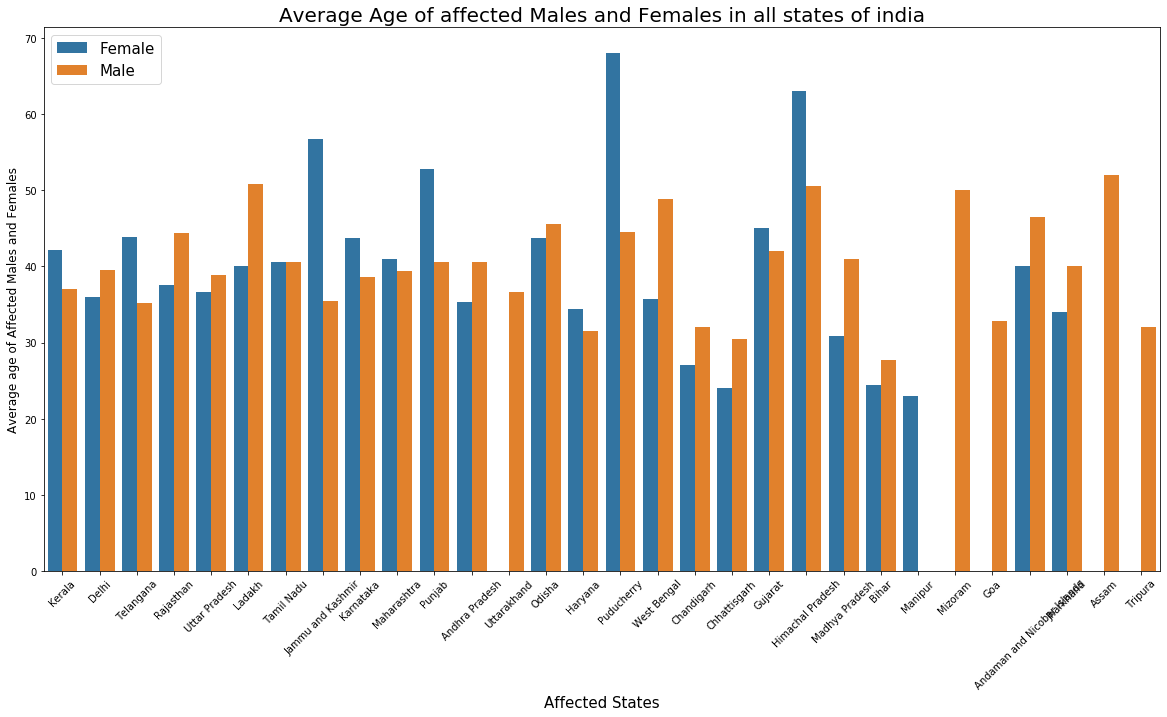

In [26]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(x="Detected State",y = 'Age Bracket',data=df_sub,hue='Gender',ci=None)
plt.legend(["Female","Male"],prop={'size': 15})
plt.xlabel("Affected States",fontdict={"size":15})
plt.ylabel("Average age of Affected Males and Females",fontdict={"size":12})
plt.title("Average Age of affected Males and Females in all states of india",fontdict={"size":20})

# The above barplot will help us see that how many number of males and females are affected in particular states of India .                                                We can say that only number of females are affected in states likes Mizoram,Goa,Assam and Tripura, also we can say tha number of males affected are higher than females in states like Kerela,Gujrat,Punjab and Telangana.